In [2]:
import pandas as pd

# 1 шаг. Осматриваем наши данные

In [3]:
df = pd.read_csv('flights.csv',index_col = 'id')

In [4]:
df.shape

(431506, 8)

In [5]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
id,,,,,,,,
298844,OO,6438,SFO,GEG,6,535,121,0
453222,AA,1486,LAS,DFW,1,495,160,1
270658,EV,5003,ATL,CHA,4,967,51,1
372442,OO,7010,DEN,MTJ,3,689,56,0
328276,EV,5180,DTW,ALB,7,1305,96,1
...,...,...,...,...,...,...,...,...
4898,AA,2287,TUL,DFW,3,595,75,0
90145,DL,2493,RIC,ATL,1,586,114,1
33644,DL,1159,ATL,SAT,4,1170,163,1


In [6]:
len(df.Airline.value_counts())

18

In [7]:
df.AirportFrom.value_counts()

ATL    27471
ORD    19847
DFW    17716
DEN    15816
LAX    13268
       ...  
MMH       13
SJT       12
GUM        9
ADK        8
ABR        2
Name: AirportFrom, Length: 293, dtype: int64

In [8]:
df.AirportTo.value_counts()

ATL    27552
ORD    19895
DFW    17745
DEN    15852
LAX    13276
       ...  
FLO       13
SJT       12
GUM       10
ADK        9
ABR        2
Name: AirportTo, Length: 293, dtype: int64

In [9]:
ports = pd.read_csv('apinfo.ru.csv', sep = '|', encoding = 'cp855')

In [10]:
ports

,0,iata_code,1,icao_code,2,name_eng,3,country_eng,4,latitude,5,longitude
0,AAA,AAA,NTGA,NTGA,Anaa,Anaa,French Polynesia,French Polynesia,-17.354999,-17.354999,-145.508332,-145.508332
1,AAB,AAB,YARY,YARY,Arrabury,Arrabury,Australia,Australia,-26.690555,-26.690555,141.047500,141.047500
2,AAC,AAC,HEAR,HEAR,Al Arish International Airport,Al Arish International Airport,Egypt,Egypt,31.073333,31.073333,33.835833,33.835833
3,AAD,AAD,TVSV,TVSV,Ad-Dabbah,Ad-Dabbah,Sudan,Sudan,17.592778,17.592778,33.959167,33.959167
4,AAE,AAE,DABB,DABB,Les Salines,Les Salines,Algeria,Algeria,36.822222,36.822222,7.809444,7.809444
...,...,...,...,...,...,...,...,...,...,...,...,...
9370,ZYK,ZYK,EPDA,EPDA,Shekou Port,Shekou Port,China,China,30.700000,30.700000,114.350000,114.350000
9371,ZYL,ZYL,VGSY,VGSY,Osmani International,Osmani International,Bangladesh,Bangladesh,24.963242,24.963242,91.866783,91.866783
9372,ZYQ,ZYQ,EPDA,EPDA,Syracuse NY Rail,Syracuse NY Rail,United States,United States,0.000000,0.000000,0.000000,0.000000
9373,ZZU,ZZU,FWUU,FWUU,Mzuzu,Mzuzu,Malawi,Malawi,-11.444750,-11.444750,34.011776,34.011776


In [11]:
ports.drop(['0','1','2','3','4','5', 'icao_code','name_eng'], axis = 1, inplace = True)

In [12]:
ports

,iata_code,country_eng,latitude,longitude
0,AAA,French Polynesia,-17.354999,-145.508332
1,AAB,Australia,-26.690555,141.047500
2,AAC,Egypt,31.073333,33.835833
3,AAD,Sudan,17.592778,33.959167
4,AAE,Algeria,36.822222,7.809444
...,...,...,...,...
9370,ZYK,China,30.700000,114.350000
9371,ZYL,Bangladesh,24.963242,91.866783
9372,ZYQ,United States,0.000000,0.000000
9373,ZZU,Malawi,-11.444750,34.011776


In [13]:
ports = ports.rename(columns = {'iata_code':'AirportFrom'})

In [14]:
ports

,AirportFrom,country_eng,latitude,longitude
0,AAA,French Polynesia,-17.354999,-145.508332
1,AAB,Australia,-26.690555,141.047500
2,AAC,Egypt,31.073333,33.835833
3,AAD,Sudan,17.592778,33.959167
4,AAE,Algeria,36.822222,7.809444
...,...,...,...,...
9370,ZYK,China,30.700000,114.350000
9371,ZYL,Bangladesh,24.963242,91.866783
9372,ZYQ,United States,0.000000,0.000000
9373,ZZU,Malawi,-11.444750,34.011776


In [15]:
df = df.merge(ports, how = 'left', on = 'AirportFrom')

In [16]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,country_eng,latitude,longitude
0,OO,6438,SFO,GEG,6,535,121,0,United States,37.618972,-122.374889
1,AA,1486,LAS,DFW,1,495,160,1,United States,36.080056,-115.152250
2,EV,5003,ATL,CHA,4,967,51,1,United States,33.636700,-84.427863
3,OO,7010,DEN,MTJ,3,689,56,0,United States,39.861667,-104.673166
4,EV,5180,DTW,ALB,7,1305,96,1,United States,42.212444,-83.353388
...,...,...,...,...,...,...,...,...,...,...,...
431501,AA,2287,TUL,DFW,3,595,75,0,United States,36.198389,-95.888111
431502,DL,2493,RIC,ATL,1,586,114,1,United States,37.505167,-77.319667
431503,DL,1159,ATL,SAT,4,1170,163,1,United States,33.636700,-84.427863
431504,CO,1877,PHL,IAH,3,920,230,1,United States,39.872249,-75.240866


In [17]:
ports = ports.rename(columns = {'AirportFrom':'AirportTo'})


In [18]:
df = df.merge(ports, how = 'left', on = 'AirportTo' )

In [19]:
df

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,country_eng_x,latitude_x,longitude_x,country_eng_y,latitude_y,longitude_y
0,OO,6438,SFO,GEG,6,535,121,0,United States,37.618972,-122.374889,United States,47.619028,-117.535222
1,AA,1486,LAS,DFW,1,495,160,1,United States,36.080056,-115.152250,United States,32.897233,-97.037694
2,EV,5003,ATL,CHA,4,967,51,1,United States,33.636700,-84.427863,United States,35.035194,-85.203555
3,OO,7010,DEN,MTJ,3,689,56,0,United States,39.861667,-104.673166,United States,38.509796,-107.894243
4,EV,5180,DTW,ALB,7,1305,96,1,United States,42.212444,-83.353388,United States,42.749116,-73.801979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431501,AA,2287,TUL,DFW,3,595,75,0,United States,36.198389,-95.888111,United States,32.897233,-97.037694
431502,DL,2493,RIC,ATL,1,586,114,1,United States,37.505167,-77.319667,United States,33.636700,-84.427863
431503,DL,1159,ATL,SAT,4,1170,163,1,United States,33.636700,-84.427863,United States,29.533694,-98.469778
431504,CO,1877,PHL,IAH,3,920,230,1,United States,39.872249,-75.240866,United States,29.984434,-95.341442


In [20]:
df.country_eng_x.value_counts()

United States        416066
Puerto Rico            1664
United Kingdom         1377
US Virgin Islands       234
Name: country_eng_x, dtype: int64

In [21]:
df.shape

(431506, 14)

In [22]:
df = df.drop(['country_eng_x', 'country_eng_y', 'AirportFrom', 'AirportTo'], axis =1)

In [23]:
df

,Airline,Flight,DayOfWeek,Time,Length,Delay,latitude_x,longitude_x,latitude_y,longitude_y
0,OO,6438,6,535,121,0,37.618972,-122.374889,47.619028,-117.535222
1,AA,1486,1,495,160,1,36.080056,-115.152250,32.897233,-97.037694
2,EV,5003,4,967,51,1,33.636700,-84.427863,35.035194,-85.203555
3,OO,7010,3,689,56,0,39.861667,-104.673166,38.509796,-107.894243
4,EV,5180,7,1305,96,1,42.212444,-83.353388,42.749116,-73.801979
...,...,...,...,...,...,...,...,...,...,...
431501,AA,2287,3,595,75,0,36.198389,-95.888111,32.897233,-97.037694
431502,DL,2493,1,586,114,1,37.505167,-77.319667,33.636700,-84.427863
431503,DL,1159,4,1170,163,1,33.636700,-84.427863,29.533694,-98.469778
431504,CO,1877,3,920,230,1,39.872249,-75.240866,29.984434,-95.341442


In [24]:
test_df = pd.read_csv('for_test.csv')

In [25]:
len(test_df.Airline.value_counts())

18

# теперь столбик время еще надо исправить

время с окружностью делаю,проекция на окружность для часов.

In [26]:
import numpy as np

In [27]:
# 24*60 = 1440
def make_harmonic_features_cos(value, period=1440):
    value *= 2 * np.pi / period
    return np.cos(value)


def make_harmonic_features_sin(value, period=1440):
    value *= 2 * np.pi / period
    return np.sin(value)

In [28]:
df['time_sin']= df.Time.apply(make_harmonic_features_sin)

In [29]:
df['time_cos']= df.Time.apply(make_harmonic_features_cos)

In [30]:
df

,Airline,Flight,DayOfWeek,Time,Length,Delay,latitude_x,longitude_x,latitude_y,longitude_y,time_sin,time_cos
0,OO,6438,6,535,121,0,37.618972,-122.374889,47.619028,-117.535222,0.722364,-0.691513
1,AA,1486,1,495,160,1,36.080056,-115.152250,32.897233,-97.037694,0.831470,-0.555570
2,EV,5003,4,967,51,1,33.636700,-84.427863,35.035194,-85.203555,-0.880891,-0.473320
3,OO,7010,3,689,56,0,39.861667,-104.673166,38.509796,-107.894243,0.134851,-0.990866
4,EV,5180,7,1305,96,1,42.212444,-83.353388,42.749116,-73.801979,-0.555570,0.831470
...,...,...,...,...,...,...,...,...,...,...,...,...
431501,AA,2287,3,595,75,0,36.198389,-95.888111,32.897233,-97.037694,0.518773,-0.854912
431502,DL,2493,1,586,114,1,37.505167,-77.319667,33.636700,-84.427863,0.551937,-0.833886
431503,DL,1159,4,1170,163,1,33.636700,-84.427863,29.533694,-98.469778,-0.923880,0.382683
431504,CO,1877,3,920,230,1,39.872249,-75.240866,29.984434,-95.341442,-0.766044,-0.642788


In [31]:
df.drop(["Time"], axis = 1 , inplace = True)

In [32]:
df

,Airline,Flight,DayOfWeek,Length,Delay,latitude_x,longitude_x,latitude_y,longitude_y,time_sin,time_cos
0,OO,6438,6,121,0,37.618972,-122.374889,47.619028,-117.535222,0.722364,-0.691513
1,AA,1486,1,160,1,36.080056,-115.152250,32.897233,-97.037694,0.831470,-0.555570
2,EV,5003,4,51,1,33.636700,-84.427863,35.035194,-85.203555,-0.880891,-0.473320
3,OO,7010,3,56,0,39.861667,-104.673166,38.509796,-107.894243,0.134851,-0.990866
4,EV,5180,7,96,1,42.212444,-83.353388,42.749116,-73.801979,-0.555570,0.831470
...,...,...,...,...,...,...,...,...,...,...,...
431501,AA,2287,3,75,0,36.198389,-95.888111,32.897233,-97.037694,0.518773,-0.854912
431502,DL,2493,1,114,1,37.505167,-77.319667,33.636700,-84.427863,0.551937,-0.833886
431503,DL,1159,4,163,1,33.636700,-84.427863,29.533694,-98.469778,-0.923880,0.382683
431504,CO,1877,3,230,1,39.872249,-75.240866,29.984434,-95.341442,-0.766044,-0.642788


In [33]:
Y = df.Delay
X = df.drop(["Airline", "Delay"],axis = 1)

In [34]:
X

,Flight,DayOfWeek,Length,latitude_x,longitude_x,latitude_y,longitude_y,time_sin,time_cos
0,6438,6,121,37.618972,-122.374889,47.619028,-117.535222,0.722364,-0.691513
1,1486,1,160,36.080056,-115.152250,32.897233,-97.037694,0.831470,-0.555570
2,5003,4,51,33.636700,-84.427863,35.035194,-85.203555,-0.880891,-0.473320
3,7010,3,56,39.861667,-104.673166,38.509796,-107.894243,0.134851,-0.990866
4,5180,7,96,42.212444,-83.353388,42.749116,-73.801979,-0.555570,0.831470
...,...,...,...,...,...,...,...,...,...
431501,2287,3,75,36.198389,-95.888111,32.897233,-97.037694,0.518773,-0.854912
431502,2493,1,114,37.505167,-77.319667,33.636700,-84.427863,0.551937,-0.833886
431503,1159,4,163,33.636700,-84.427863,29.533694,-98.469778,-0.923880,0.382683
431504,1877,3,230,39.872249,-75.240866,29.984434,-95.341442,-0.766044,-0.642788


# ТЕПЕРЬ РАБОТАЕМ С ТЕСТОВЫМ МНОЖЕСТВОМ

#Добавим координаты аэропортов

# Можно функцией сделать! ,внизу без функции!

In [35]:
def prepare_data(data):
    ports = pd.read_csv('apinfo.ru.csv', sep = '|', encoding = 'cp855')
    ports.drop(['0','1','2','3','4','5', 'icao_code','name_eng'], axis = 1, inplace = True)

#Добавим координаты аэропортов
    ports = ports.rename(columns = {'iata_code':'AirportFrom'})
    data = data.merge(ports, how = 'left', on = 'AirportFrom')
    ports = ports.rename(columns = {'AirportFrom':'AirportTo'})
    data = data.merge(ports, how = 'left', on = 'AirportTo' )
    
#закодируем время.    
    data['time_sin']= data.Time.apply(make_harmonic_features_sin)
    data['time_cos']= data.Time.apply(make_harmonic_features_cos)
    
# delete items   
    data.drop(["country_eng_y","country_eng_x","AirportFrom","AirportTo","Time","Airline"], axis = 1, inplace = True)
    
    return data
    

In [36]:
test_df = prepare_data(test_df)

In [37]:
test_df

,id,Flight,DayOfWeek,Length,latitude_x,longitude_x,latitude_y,longitude_y,time_sin,time_cos
0,26832,2913,4,110,32.897233,-97.037694,30.483219,-86.526044,-0.382683,-0.923880
1,150199,1014,4,124,35.213750,-80.949055,41.976940,-87.908149,-0.889017,-0.457874
2,347019,198,1,311,37.618972,-122.374889,38.947444,-77.459944,-0.271440,0.962455
3,92565,1558,1,186,33.675667,-117.868222,29.984434,-95.341442,0.043619,-0.999048
4,398703,1899,4,192,35.213750,-80.949055,29.533694,-98.469778,-0.999762,0.021815
...,...,...,...,...,...,...,...,...,...,...
107872,62380,575,6,90,36.080056,-115.152250,38.695417,-121.590778,-0.500000,-0.866025
107873,247768,664,3,170,26.072583,-80.152750,40.639751,-73.778926,0.065403,-0.997859
107874,474175,2663,2,74,38.852083,-77.037722,41.409407,-81.854690,0.442289,-0.896873
107875,372742,2916,3,167,41.303167,-95.894056,40.692500,-74.168667,0.087156,-0.996195


In [38]:
ports = ports.rename(columns = {'iata_code':'AirportFrom'})
test_df = test_df.merge(ports, how = 'left', on = 'AirportFrom')
ports = ports.rename(columns = {'AirportFrom':'AirportTo'})
test_df = test_df.merge(ports, how = 'left', on = 'AirportTo' )

KeyError: 'AirportFrom'

закодируем время. ВАЖНОж ПОРЯДОК SIN И COS СТОЛБЦОВ ДОЛЖЕН БЫТЬ ТАКОЙ ЖЕ,КАК В ТРЕНИРОВОЧНОМ МНОЖЕСТВЕ! (У НАС ПЕРВЫЙ СИНУС СТОЛБЕЦ, ВТОРОЙ КОСИНУС СТОЛБЕЦ!

In [131]:
test_df['time_sin']= test_df.Time.apply(make_harmonic_features_sin)
test_df['time_cos']= test_df.Time.apply(make_harmonic_features_cos)

DELETE ITEMS

In [133]:
test_df.drop(["country_eng_y","country_eng_x","AirportFrom","AirportTo","Time","Airline"], axis = 1, inplace = True)

In [134]:
test_df

,id,Flight,DayOfWeek,Length,latitude_x,longitude_x,latitude_y,longitude_y,time_sin,time_cos
0,26832,2913,4,110,32.897233,-97.037694,30.483219,-86.526044,-0.382683,-0.923880
1,150199,1014,4,124,35.213750,-80.949055,41.976940,-87.908149,-0.889017,-0.457874
2,347019,198,1,311,37.618972,-122.374889,38.947444,-77.459944,-0.271440,0.962455
3,92565,1558,1,186,33.675667,-117.868222,29.984434,-95.341442,0.043619,-0.999048
4,398703,1899,4,192,35.213750,-80.949055,29.533694,-98.469778,-0.999762,0.021815
...,...,...,...,...,...,...,...,...,...,...
107872,62380,575,6,90,36.080056,-115.152250,38.695417,-121.590778,-0.500000,-0.866025
107873,247768,664,3,170,26.072583,-80.152750,40.639751,-73.778926,0.065403,-0.997859
107874,474175,2663,2,74,38.852083,-77.037722,41.409407,-81.854690,0.442289,-0.896873
107875,372742,2916,3,167,41.303167,-95.894056,40.692500,-74.168667,0.087156,-0.996195


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431506 entries, 0 to 431505
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Airline      431506 non-null  object 
 1   Flight       431506 non-null  int64  
 2   DayOfWeek    431506 non-null  int64  
 3   Length       431506 non-null  int64  
 4   Delay        431506 non-null  int64  
 5   latitude_x   419341 non-null  float64
 6   longitude_x  419341 non-null  float64
 7   latitude_y   419387 non-null  float64
 8   longitude_y  419387 non-null  float64
 9   time_sin     431506 non-null  float64
 10  time_cos     431506 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 39.5+ MB


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107877 entries, 0 to 107876
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           107877 non-null  int64  
 1   Flight       107877 non-null  int64  
 2   DayOfWeek    107877 non-null  int64  
 3   Length       107877 non-null  int64  
 4   latitude_x   104888 non-null  float64
 5   longitude_x  104888 non-null  float64
 6   latitude_y   104839 non-null  float64
 7   longitude_y  104839 non-null  float64
 8   time_sin     107877 non-null  float64
 9   time_cos     107877 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 9.1 MB


# ОБУЧЕНИЕ И ТЕСТИРОВАНИЕ МОДЕЛИ

In [40]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
sc = MinMaxScaler()

In [42]:
X = sc.fit_transform(X)

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y, test_size = 0.25, random_state = 0)

In [45]:
model = models.Sequential()
#layers.Dense - слой самых протсых нейроннов,берем n штук
#input_shape = (9, - это размерность наших данных
# У НАС БИНАРНАЯ КЛАССИФИКАЦИЯ И НАМ ХОРОШО ПОДХОДИТ СИГМОИДАЛЬНАЯ ФУНКЦИЯ (activation="sigmoid")
# НЕЙРОН 1 РЕШАЕТ ,0- there are no delays, 1 ,there are delays.
#
model.add(layers.Dense(300, activation="relu", input_shape = (9,)))
model.add(layers.Dense(1, activation="sigmoid"))


In [46]:
# Компиляция модели
# проверяем на этом этапе функцию потерь(двоичная кросс энтропия-оптимизирует функцию потери)
#  и нужен оптимайзер,который заставляет веса подстраивать, в нашем примере это метрика accuracy( правильное попадание в класс)
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

#

In [47]:
#смотрим на количество параметров
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               3000      
                                                                 
 dense_1 (Dense)             (None, 1)                 301       
                                                                 
Total params: 3,301
Trainable params: 3,301
Non-trainable params: 0
_________________________________________________________________


In [48]:
# batch_size=32 - 32 строчки,обучающих примера предъьявляться будет сети,потом накапливается ошибка,распространяется и веса накапливаются
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=75, batch_size=32)

Epoch 1/75
10114/10114 [==============================] - 21s 2ms/step - loss: nan - accuracy: 0.5546 - val_loss: nan - val_accuracy: 0.5545
Epoch 2/75
10114/10114 [==============================] - 20s 2ms/step - loss: nan - accuracy: 0.5546 - val_loss: nan - val_accuracy: 0.5545
Epoch 3/75
10114/10114 [==============================] - 18s 2ms/step - loss: nan - accuracy: 0.5546 - val_loss: nan - val_accuracy: 0.5545
Epoch 4/75
10114/10114 [==============================] - 19s 2ms/step - loss: nan - accuracy: 0.5546 - val_loss: nan - val_accuracy: 0.5545
Epoch 5/75
10114/10114 [==============================] - 20s 2ms/step - loss: nan - accuracy: 0.5546 - val_loss: nan - val_accuracy: 0.5545
Epoch 6/75
10114/10114 [==============================] - 19s 2ms/step - loss: nan - accuracy: 0.5546 - val_loss: nan - val_accuracy: 0.5545
Epoch 7/75
10114/10114 [==============================] - 19s 2ms/step - loss: nan - accuracy: 0.5546 - val_loss: nan - val_accuracy: 0.5545
Epoch 8/75
10

In [51]:
from matplotlib import pyplot as plt
def draw_curves (history, los, metric):
    
    acc = history.history[metric]
    val_acc = history.history['val_'+metric]
    loss = history.history[los]
    val_loss = history.history['val_'+los]

    epochs = range(1, len(acc)+1)
    plt.plot(epochs, acc, 'bo', label = 'Training '+metric)
    plt.plot(epochs, val_acc, 'b', label = 'Validation '+metric)
    plt.title('Training and Validation '+metric)
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label = 'Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and Validation loss')
    plt.legend()

    plt.show()


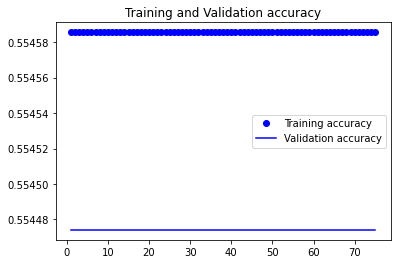

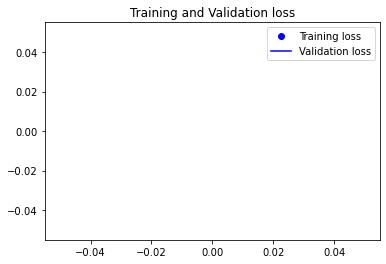

In [52]:
draw_curves(history, 'loss', 'accuracy')
# draw_curves(history, 'loss', 'auc')